In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import contextily as cx
import csv
import numpy as np

In [2]:
slc_shapefile_path = 'zcta_data/slc_zcta.shp'
slc_gdf = gpd.read_file(slc_shapefile_path)
slc_gdf.to_crs(epsg=4326, inplace=True)
slc_gdf.head()

,ZCTA5,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,84070,84070,B5,G6350,S,19004717,0,+40.5771115,-111.8891029,"POLYGON ((-111.92159 40.57902, -111.92140 40.5..."
1,84108,84108,B5,G6350,S,187120680,381009,+40.8090403,-111.7275160,"POLYGON ((-111.84774 40.75849, -111.84726 40.7..."
2,84096,84096,B5,G6350,S,184045743,128519,+40.4870371,-112.0999829,"POLYGON ((-112.18765 40.51390, -112.18754 40.5..."
3,84129,84129,B5,G6350,S,17271536,0,+40.6535775,-111.9620632,"POLYGON ((-111.99152 40.63448, -111.99110 40.6..."
4,84084,84084,B5,G6350,S,17196254,0,+40.6213910,-111.9660607,"POLYGON ((-112.00622 40.62649, -112.00602 40.6..."


In [31]:
trx01_df = pd.read_csv('./data/transit_dfs/TRX01_df.csv', low_memory=False, header=1)
trx02_df = pd.read_csv('./data/transit_dfs/TRX02_df.csv', low_memory=False, header=1)
trx03_df = pd.read_csv('./data/transit_dfs/TRX03_df.csv', low_memory=False, header=1)

transit_df = pd.concat([trx01_df, trx02_df, trx03_df])
# transit_df = transit_df[transit_df['Date'] == '2021-08-06']
transit_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,2018,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,2018,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.0,-9999.0,6.0,2.0,...,2018,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.0,-9999.0,5.0,2.0,...,2018,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.0,-9999.0,6.0,2.0,...,2018,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00


In [32]:
# Create a GeoSeries from the latitude and longitude data
transit_df['Point'] = gpd.GeoSeries([Point(xy) for xy in zip(transit_df['Longitude_ddeg'], transit_df['Latitude_ddeg'])])
transit_df.head(10)

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category,Point
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00,POINT (-111.91929 40.72269)
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00,POINT (-111.91891 40.72279)
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.0,-9999.0,6.0,2.0,...,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00,POINT (-111.91856 40.72292)
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.0,-9999.0,5.0,2.0,...,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00,POINT (-111.91867 40.72296)
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.0,-9999.0,6.0,2.0,...,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00,POINT (-111.91871 40.72301)
5,2018-11-19 20:18:22,40.722870,-111.918510,1223.6,13.65,21.45,-9999.0,-9999.0,5.0,2.0,...,11,323,19,18,20,TRX01,Good,< 12.00,4.00 - 6.00,POINT (-111.91851 40.72287)
6,2018-11-19 20:19:34,40.722816,-111.918793,1226.2,13.65,21.45,-9999.0,-9999.0,5.0,2.0,...,11,323,19,19,20,TRX01,Good,< 12.00,4.00 - 6.00,POINT (-111.91879 40.72282)
7,2018-11-19 20:20:46,40.722778,-111.918854,1227.2,13.65,21.48,-9999.0,-9999.0,6.0,2.0,...,11,323,19,20,20,TRX01,Good,< 12.00,6.00 - 8.00,POINT (-111.91885 40.72278)
8,2018-11-19 20:21:46,40.723064,-111.918678,1227.3,13.64,21.51,-9999.0,-9999.0,7.0,2.0,...,11,323,19,21,20,TRX01,Good,< 12.00,6.00 - 8.00,POINT (-111.91868 40.72306)
9,2018-11-19 20:22:58,40.723011,-111.918747,1227.9,13.64,21.53,-9999.0,-9999.0,6.0,2.0,...,11,323,19,22,20,TRX01,Good,< 12.00,6.00 - 8.00,POINT (-111.91875 40.72301)


In [25]:
transit_gdf = gpd.GeoDataFrame(transit_df, geometry='Point', crs='epsg:4326')
transit_gdf.head()
transit_slc_gdf = gpd.sjoin(transit_gdf, slc_gdf, how="left", predicate='within')
transit_slc_gdf = transit_slc_gdf[transit_slc_gdf['Year'] == 2019]
transit_slc_gdf.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,index_right,ZCTA5,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
46131,2019-01-01 00:00:00,40.769608,-111.838913,1491.5,14.45,0.35,-9999.0,-9999.0,2.0,2.0,...,8.0,84112.0,84112,B5,G6350,S,2293238.0,0.0,+40.7652540,-111.8413618
46132,2019-01-01 00:01:00,40.769608,-111.838913,1491.6,14.43,0.33,-9999.0,-9999.0,2.0,2.0,...,8.0,84112.0,84112,B5,G6350,S,2293238.0,0.0,+40.7652540,-111.8413618
46133,2019-01-01 00:02:00,40.769611,-111.838913,1491.6,14.44,0.31,-9999.0,-9999.0,2.0,2.0,...,8.0,84112.0,84112,B5,G6350,S,2293238.0,0.0,+40.7652540,-111.8413618
46134,2019-01-01 00:03:00,40.769611,-111.838913,1491.7,14.44,0.29,-9999.0,-9999.0,2.0,2.0,...,8.0,84112.0,84112,B5,G6350,S,2293238.0,0.0,+40.7652540,-111.8413618
46135,2019-01-01 00:04:00,40.769615,-111.838913,1491.7,14.44,0.27,-9999.0,-9999.0,2.0,2.0,...,8.0,84112.0,84112,B5,G6350,S,2293238.0,0.0,+40.7652540,-111.8413618


In [26]:
transit_avg_zcta = transit_slc_gdf.groupby('ZCTA5')['ES642_PM2.5_Concentration_ug/m3'].mean()
transit_avg_zcta = transit_avg_zcta.reset_index()
transit_avg_zcta['ZCTA5'] = transit_avg_zcta['ZCTA5'].astype(int)

transit_avg_zcta.head()


,ZCTA5,ES642_PM2.5_Concentration_ug/m3
0,84009,4.830329
1,84020,2.815126
2,84047,5.721049
3,84070,3.632558
4,84081,5.511045


In [27]:
slc_zcta_list_path = './zcta_data/slc_zcta.csv'

slc_zcta_list = []

with open(slc_zcta_list_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        int_row = [int(i) for i in row]
        slc_zcta_list.append(int_row)
        
slc_zcta_list = [item for sublist in slc_zcta_list for item in sublist]

house_value_path = './data/census_data/median_house_value_df.csv'
house_value_df = pd.read_csv(house_value_path)
house_value_df = house_value_df[house_value_df['ZCTA5'].isin(slc_zcta_list)]
house_value_df.columns = house_value_df.columns.str.strip()
house_value_df = house_value_df.replace(',','', regex=True)
house_value_df = house_value_df.replace('-', np.nan)
house_value_df = house_value_df.rename(columns={'Median value (dollars)': 'Median_House_Value'})
house_value_df['Median_House_Value'] = house_value_df['Median_House_Value'].astype(float)
house_value_df = house_value_df.reset_index(drop=True)

house_value_df.head()

,ZCTA5,Median_House_Value
0,84006,274600.0
1,84009,424600.0
2,84020,569700.0
3,84044,252900.0
4,84047,297400.0


In [30]:
if isinstance(transit_avg_zcta, pd.Series):
    transit_avg_zcta = transit_avg_zcta.to_frame()

# # Merge transit_slc_gdf and transit_avg_zcta
# merged_df = transit_slc_gdf.merge(transit_avg_zcta, on='ZCTA5')

# Merge merged_df and house_value_df
transit_socioecon = transit_avg_zcta.merge(house_value_df, on='ZCTA5')

transit_socioecon.head(20)

,ZCTA5,ES642_PM2.5_Concentration_ug/m3,Median_House_Value
0,84009,4.830329,424600.0
1,84020,2.815126,569700.0
2,84047,5.721049,297400.0
3,84070,3.632558,330600.0
4,84081,5.511045,371900.0
5,84088,5.858832,341300.0
6,84101,5.273411,417700.0
7,84102,6.605192,384000.0
8,84103,4.242826,580500.0
9,84104,3.175055,230700.0


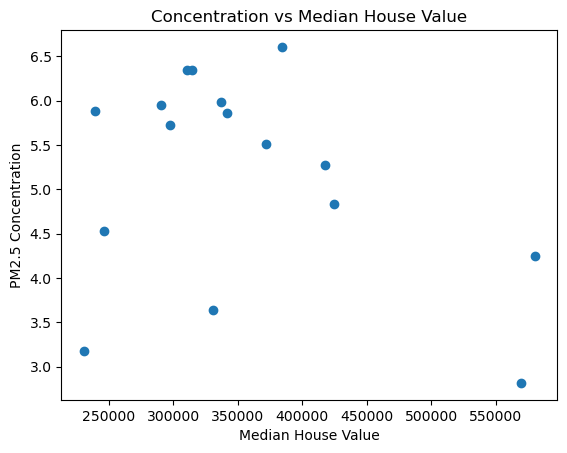

In [29]:
import matplotlib.pyplot as plt

plt.scatter(transit_socioecon['Median_House_Value'], transit_socioecon['ES642_PM2.5_Concentration_ug/m3'])
plt.xlabel('Median House Value')
plt.ylabel('PM2.5 Concentration')
plt.title('Concentration vs Median House Value')
plt.show()